In [1]:
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 111)
pd.set_option('display.width', 1000)

bank = pd.read_csv('C:/Users/Pravin Gorlewar/Desktop/upgrade/EDACaseStudy\loan.csv',sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

def ReplaceString(arg):
    if int(arg[4:]) <23:
        arg = arg.replace('-','/20')
    else:
        arg = arg.replace('-','/19')
    return arg

def format_date(el):
    return datetime.strptime(el, '%b/%Y').strftime('%B-%Y')


#Data Formatting & cleaning

#drop all columm with null values

bank = bank.dropna(how='all', axis=1)

#drop columm max null values
bank.drop('next_pymnt_d', axis=1, inplace=True)
bank.drop('mths_since_last_record', axis=1, inplace=True)
bank.drop('mths_since_last_delinq', axis=1, inplace=True)
bank.drop('desc', axis=1, inplace=True)


#drop all row with null values
bank = bank.dropna(how='all')

# Datatype corrected to intereget
#Unique ID
bank['id'] = bank['id'].astype('int64')

#The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
bank['delinq_2yrs'] = bank['delinq_2yrs'].astype('int64')

bank['total_acc'] = bank['total_acc'].astype('int64')
bank['pub_rec'] = bank['pub_rec'].astype('int64')
bank['open_acc'] = bank['open_acc'].astype('int64')
bank['inq_last_6mths'] = bank['inq_last_6mths'].astype('int64')
bank['delinq_amnt'] = bank['delinq_amnt'].astype('int64')

# Datatype corrected to Float
bank['loan_amnt'] = bank['loan_amnt'].astype('float')
bank['funded_amnt'] = bank['funded_amnt'].astype('float')
bank['funded_amnt_inv'] = bank['funded_amnt_inv'].astype('float')
bank['installment'] = bank['installment'].astype('float')
bank['annual_inc'] = bank['annual_inc'].astype('float')
bank['dti'] = bank['dti'].astype('float')
bank['last_pymnt_amnt'] = bank['last_pymnt_amnt'].astype('float')
bank['collection_recovery_fee'] = bank['collection_recovery_fee'].astype('float')
bank['recoveries'] = bank['recoveries'].astype('float')
bank['total_rec_int'] = bank['total_rec_int'].astype('float')
bank['total_rec_prncp'] = bank['total_rec_prncp'].astype('float')
bank['total_pymnt_inv'] = bank['total_pymnt_inv'].astype('float')
bank['total_pymnt'] = bank['total_pymnt'].astype('float')
bank['out_prncp_inv'] = bank['out_prncp_inv'].astype('float')
bank['out_prncp'] = bank['out_prncp'].astype('float')
bank['revol_bal'] = bank['revol_bal'].astype('float')
bank['tax_liens'] = bank['tax_liens'].astype('float')
bank['pub_rec_bankruptcies'] = bank['pub_rec_bankruptcies'].astype('float')
bank['collections_12_mths_ex_med'] = bank['collections_12_mths_ex_med'].astype('float')
bank['chargeoff_within_12_mths'] = bank['chargeoff_within_12_mths'].astype('float')


bank['int_rate']= bank['int_rate'].str.replace('%','')
bank['int_rate'] = bank['int_rate'].astype('float')


#bank['loan_status'].unique()

C:\Users\Pravin Gorlewar\AppData\Local\Temp\ipykernel_28336\3630051974.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  bank = pd.read_csv('C:/Users/Pravin Gorlewar/Desktop/upgrade/EDACaseStudy\loan.csv',sep=',', error_bad_lines=False, index_col=False, dtype='unicode')


In [2]:
#Drop column not in much use

col = ['id', 'member_id', 'emp_title', 'pymnt_plan', 'zip_code', 'url', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'policy_code','tax_liens', 'application_type', 'pub_rec_bankruptcies', 'addr_state', 'delinq_amnt','chargeoff_within_12_mths', 'acc_now_delinq', 'collections_12_mths_ex_med', 'title' ]

bank.drop(col, axis=1, inplace=True)



In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  float64
 1   funded_amnt              39717 non-null  float64
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [4]:
# Handle missing values
bank['emp_length'].unique()

#index_names = bank[ bank['emp_length'] == '' ].index
bank.dropna(subset = ['emp_length'], inplace=True)
bank.dropna(subset = ['last_pymnt_d'], inplace=True)
bank.dropna(subset = ['last_credit_pull_d'], inplace=True)
bank.dropna(subset = ['revol_util'], inplace=True)



In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38531 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38531 non-null  float64
 1   funded_amnt              38531 non-null  float64
 2   funded_amnt_inv          38531 non-null  float64
 3   term                     38531 non-null  object 
 4   int_rate                 38531 non-null  float64
 5   installment              38531 non-null  float64
 6   grade                    38531 non-null  object 
 7   sub_grade                38531 non-null  object 
 8   emp_length               38531 non-null  object 
 9   home_ownership           38531 non-null  object 
 10  annual_inc               38531 non-null  float64
 11  verification_status      38531 non-null  object 
 12  issue_d                  38531 non-null  object 
 13  loan_status              38531 non-null  object 
 14  purpose               

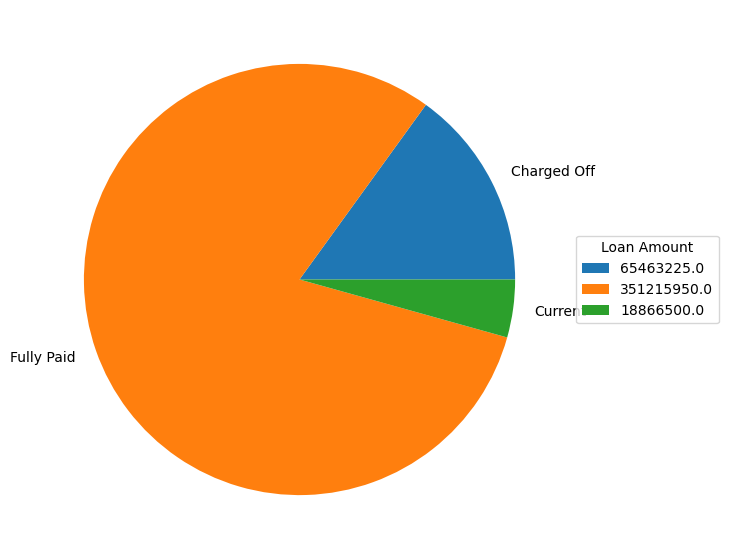

In [6]:

#Check record distribution based on loan status
chargedoff = bank[bank['loan_status'] == 'Charged Off']['loan_amnt'].sum() 
fullypaid = bank[bank['loan_status'] == 'Fully Paid']['loan_amnt'].sum()
current = bank[bank['loan_status'] == 'Current']['loan_amnt'].sum()

fig, ax = plt.subplots(figsize =(10, 7))
lslabel = ['Charged Off','Fully Paid', 'Current']
loan_status = [chargedoff,fullypaid,current]

plt.pie(loan_status, labels = lslabel)
plt.legend(loan_status,title="Loan Amount",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


In [7]:
#Drop resources with loan_status = current
index_names = bank[ bank['loan_status'] == 'Current' ].index
bank.drop(index_names, inplace = True)

In [8]:
#Remove Outliers

def outlierfunc(x):
    Q3 = x.quantile(0.75)
    Q1 = x.quantile(0.25)

    IQR = Q3 - Q1

    lowlimit = Q1 - 1.5*IQR
    uplimit = Q3 + 1.5*IQR
    
    return uplimit

bank = bank[bank['annual_inc'] <= outlierfunc(bank['annual_inc'])] 
#bank = bank[bank['annual_inc'] <= outlierfunc(bank['annual_inc'])] 


In [9]:
#bank.boxplot('annual_inc')
#bank.plot.bar(x='annual_inc', y = 'loan_amnt')


#Convert data is suitable formate
#convert emp_length in interger, assumpming <1 as 0 and 10+ as 10
bank['emp_length'] = bank['emp_length'].apply(lambda x: 0 if "<" in str(x) else (10 if "+" in str(x) else str(x).split()[0]))

#Create Dirived Variable

def ReplaceString(arg):
    arg = str(arg).replace('-','/20')
    return arg

#def format_date(el):
#    return datetime.strptime(el, '%b/%Y').strftime('%B-%Y')

bank['issue_d']= bank['issue_d'].apply(ReplaceString)
bank['issue_d'] = pd.to_datetime(bank['issue_d'])
bank['issue_year'] = pd.DatetimeIndex(bank['issue_d']).year


In [10]:

#bank['issue_year']

# Binning Continuous features:


In [11]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
bank['loan_amnt_range'] = pd.cut(bank['loan_amnt'], bins, labels=bucket_l)

#create bins for interest rate
bins = [0,7.5,10, 12.5, 15, 30]
bucket_i = ['0-7.5', '7.5-10','10-12.5','12.5-15','15+']
bank['int_rate_range']  = pd.cut(bank['int_rate'],bins,bucket_i)

#create bins for annual income
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
bank['annual_inc_range'] = pd.cut(bank['annual_inc'], bins, labels=bucket_l)


# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_d = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
bank['dti_range'] = pd.cut(bank['dti'], bins, labels=bucket_d)


# Univariate Analysis

[Text(0, 0, '30575'), Text(0, 0, '5129')]

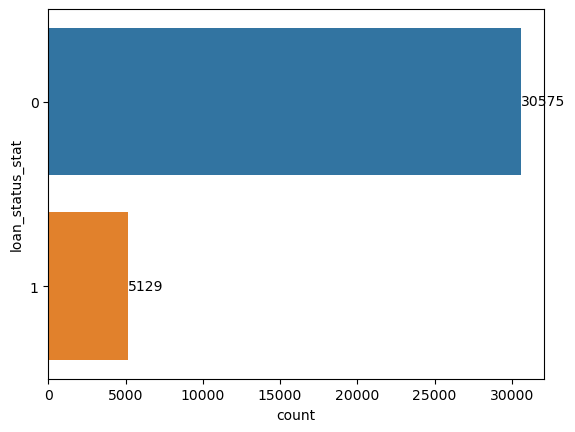

In [12]:
#check Defaulter % from Loan Status

bank['loan_status_stat'] = bank['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

ax = sns.countplot(y="loan_status_stat", data=bank)
ax.bar_label(ax.containers[0])

#### From above plot we see that around 14% people are defaulted( i.e. 5129 out of 35704

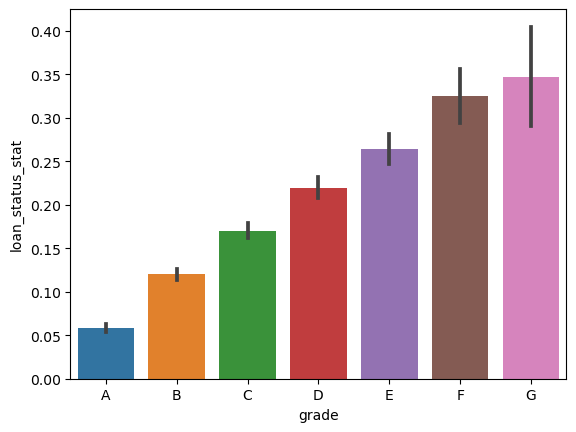

In [13]:
#check defaulter vs grade

#defaulter_list = bank[bank['loan_status_stat'] == 1]
ls = ['A', 'B', 'C','D','E','F','G']
ax = sns.barplot(x='grade', y='loan_status_stat', data=bank, order=ls)

plt.show()
#ax.set_yticks([0, 1, 2, 3, 4])
#ax.set_yticklabels(["A", "B", "C", "D", "E", "F","G"])

#### From above plot we see that defaulters increase as grade increases

Person with upper grade has higher chances of getting defaulter


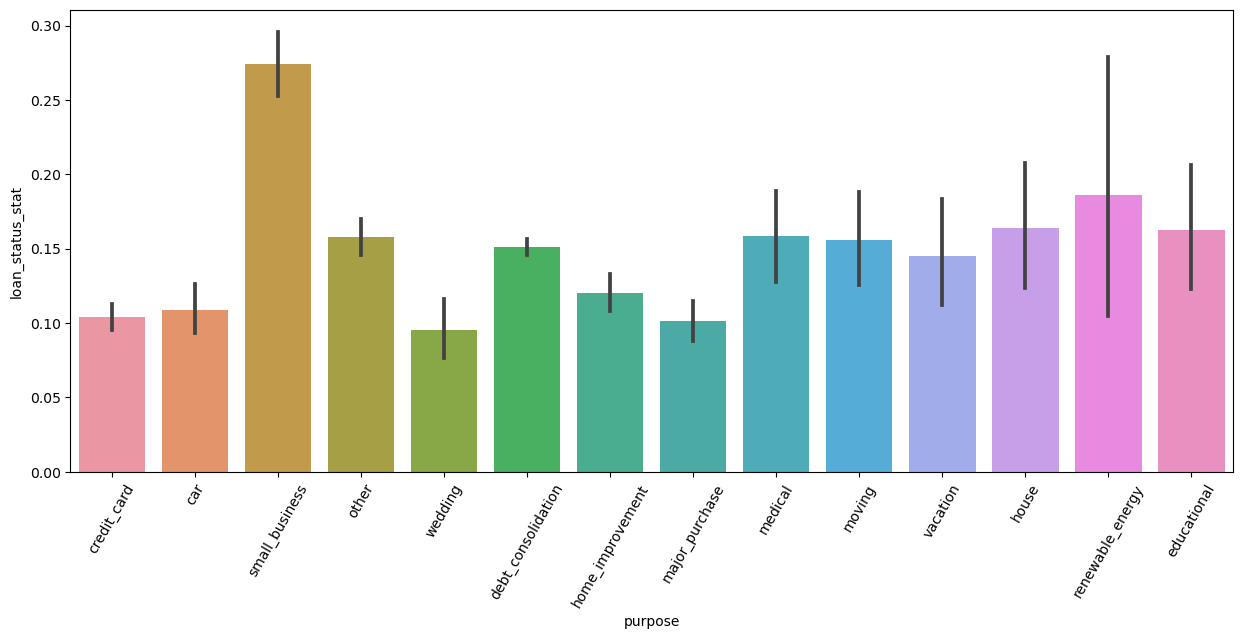

In [14]:
#check defaulter vs purpose

xlabels = bank['purpose'].unique()
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='purpose', y='loan_status_stat', data=bank)
ax.set_xticklabels(xlabels, rotation=60)

plt.show(fig)

#### From above plot we see that defaulters are higher for "Small Business", and defaulters in rest purpose looks almost similar

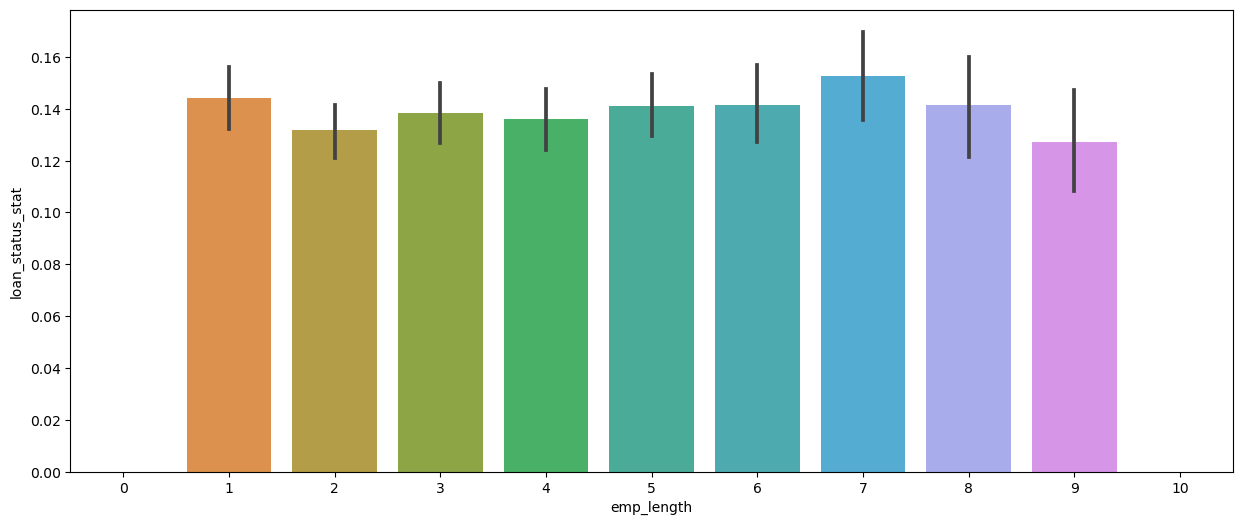

In [15]:
#check emp_length vs defaulter


ls = ['0','1','2','3','4','5','6','7','8','9','10']
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='emp_length', y='loan_status_stat', data=bank, order=ls)


plt.show(fig)

##### From above plot we can say that the defaulters is constant here, hence defaulter does not depends on Employee's employment experiance.

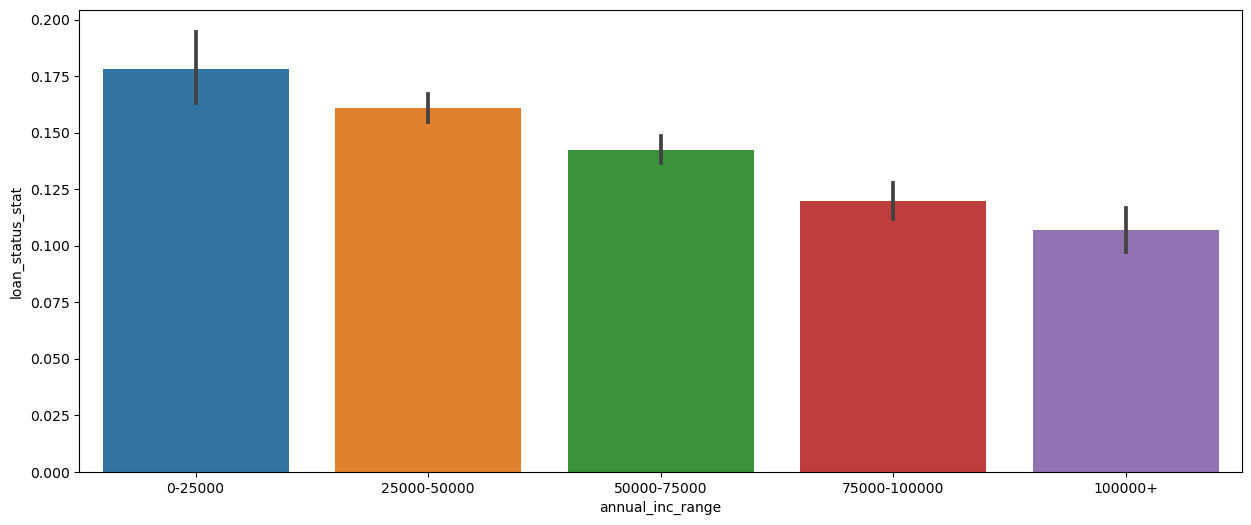

In [16]:
#Check Annual incpme vs defailter


fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='annual_inc_range', y='loan_status_stat', data=bank)


plt.show(fig)

##### From above plot we can say that Defauler rate is decreasing as there is increase in annual income. 

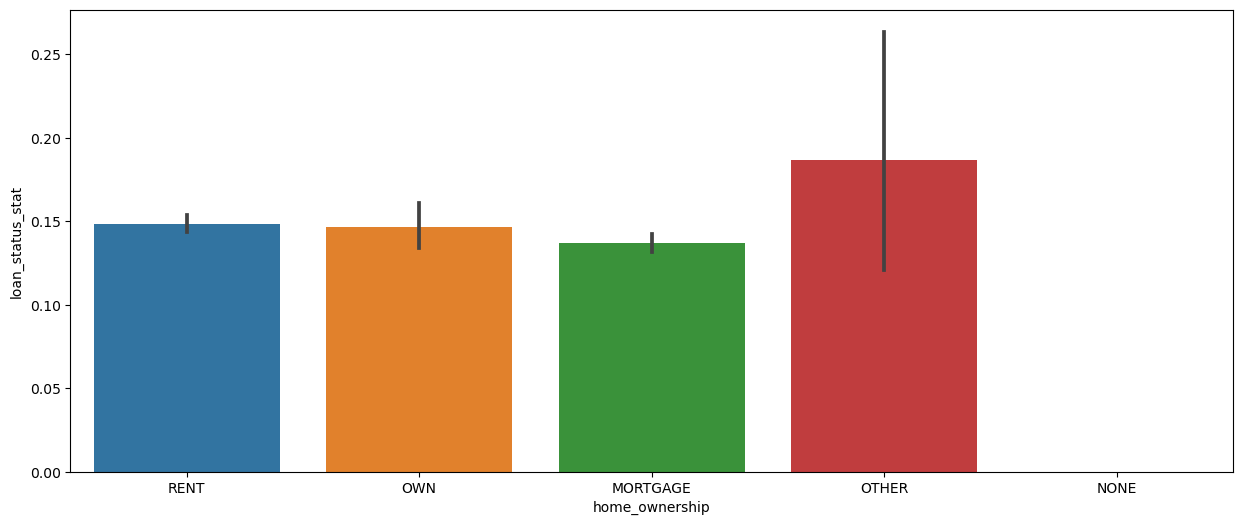

In [17]:
# Check home_ownership vs defaulter

#xlabels = bank['home_ownership'].unique()
#ls = ['0','1','2','3','4','5','6','7','8','9','10']
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='home_ownership', y='loan_status_stat', data=bank)
#ax.set_xticklabels(xlabels, rotation=60)
plt.show()

##### ##### From above plot we can say that the defaulters is almost similar here, hence defaulter does not depends on Home Ownweship.

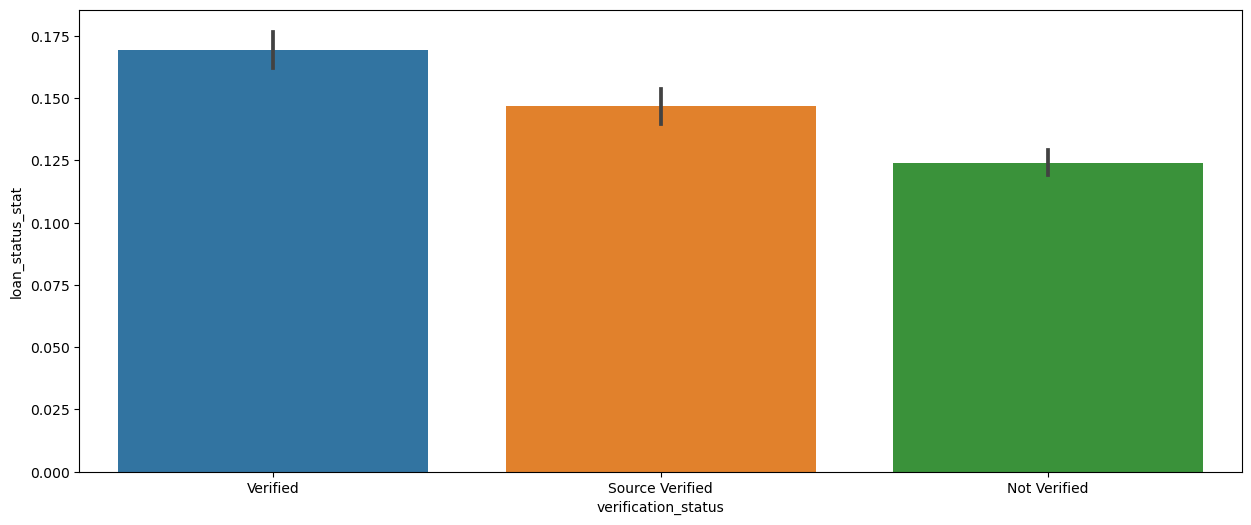

In [18]:
#check verification_status vs defaulter


fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='verification_status', y='loan_status_stat', data=bank)

plt.show()


##### From above plot we can say that the defaulters rate is increasing from 'not verified' to 'verified' status. Verification_status field not useful much for analysis. 

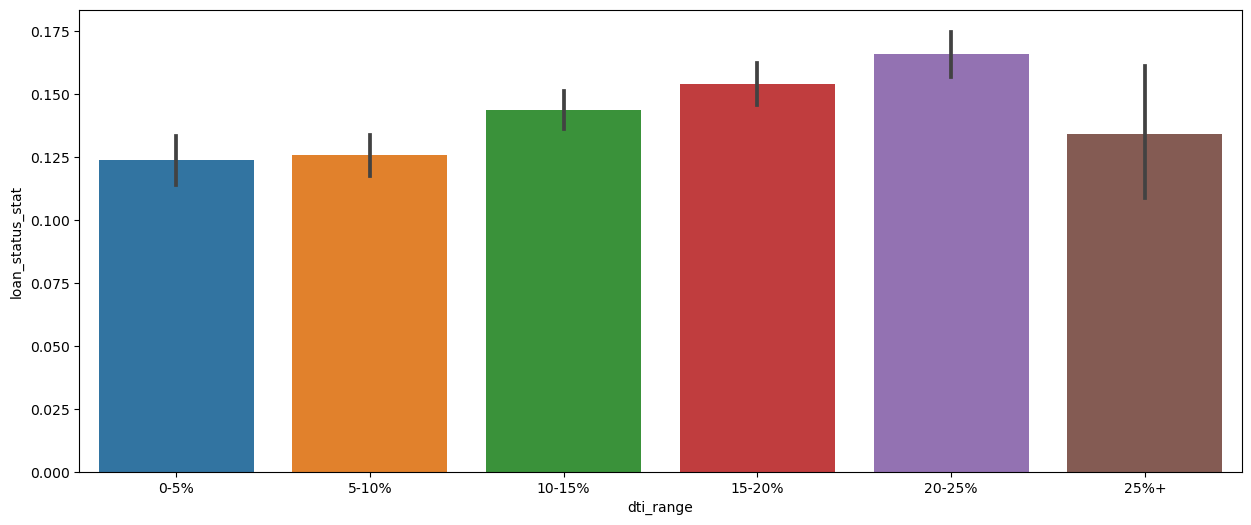

In [19]:
# Check DTI vas Defaulter

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='dti_range', y='loan_status_stat', data=bank)

plt.show()

##### From above plot we can say that the defaulters rate is increasing as with dti_range values(except at 25+%), hence defaulter rate will depend on dti_range.

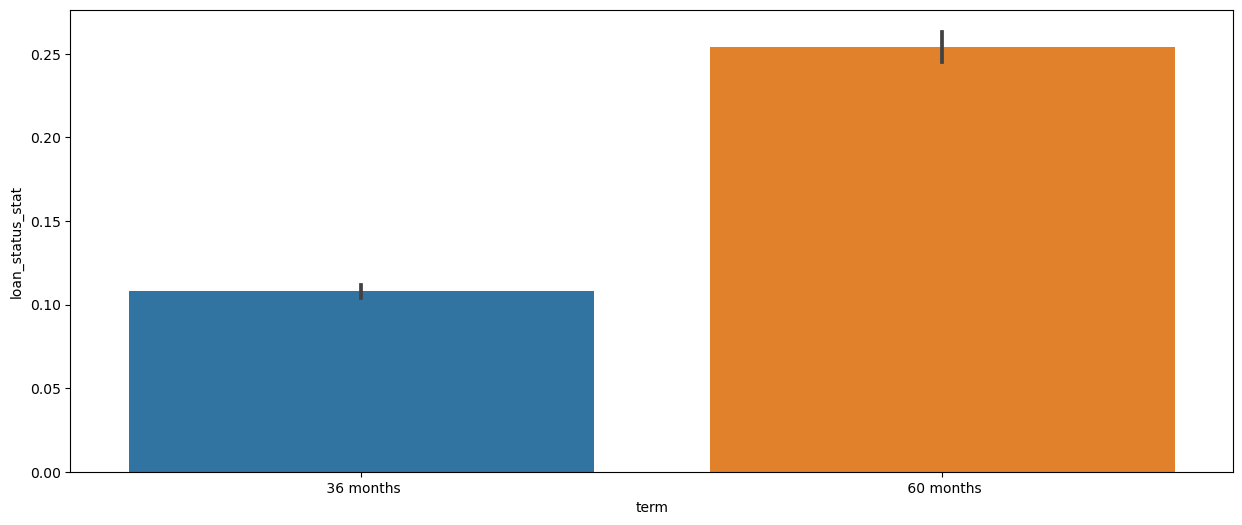

In [20]:
# term vas Defaulter

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='term', y='loan_status_stat', data=bank)

plt.show()

##### From above plot we can say that the defaulters rate is higher for "60 months" term

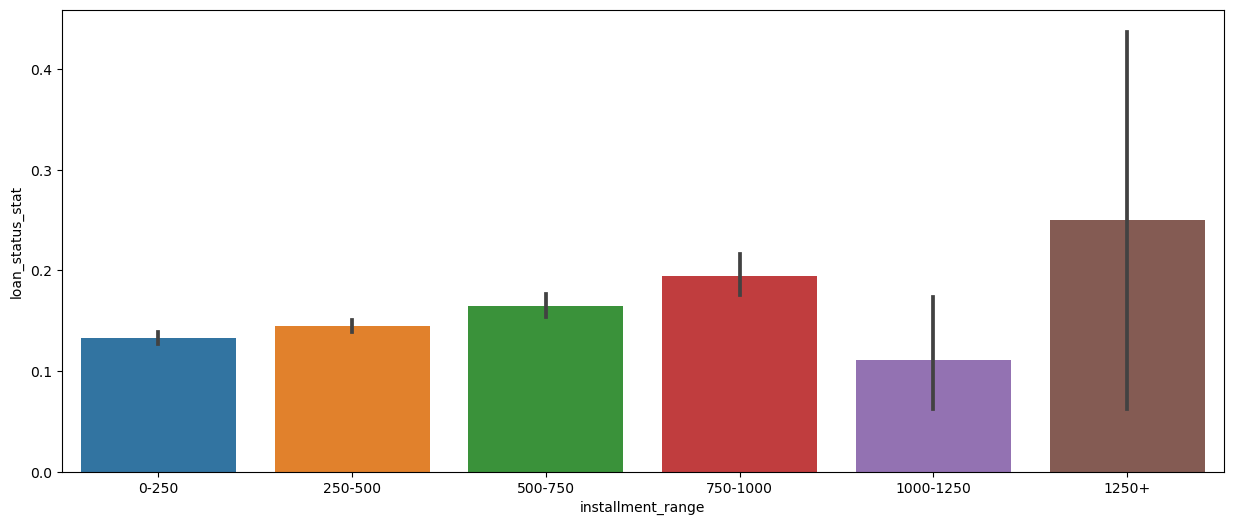

In [21]:
# installment vas Defaulter

bins = [0, 250, 500, 750, 1000, 1250, 1500]
bucket_d = ['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250+']
bank['installment_range'] = pd.cut(bank['installment'], bins, labels=bucket_d)

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='installment_range', y='loan_status_stat', data=bank)
#bank['installment'].max()
#plt.show()

##### From above plot we can say that the defaulters rate is increasing as with installment values, hence defaulter rate will depend on installment_range.

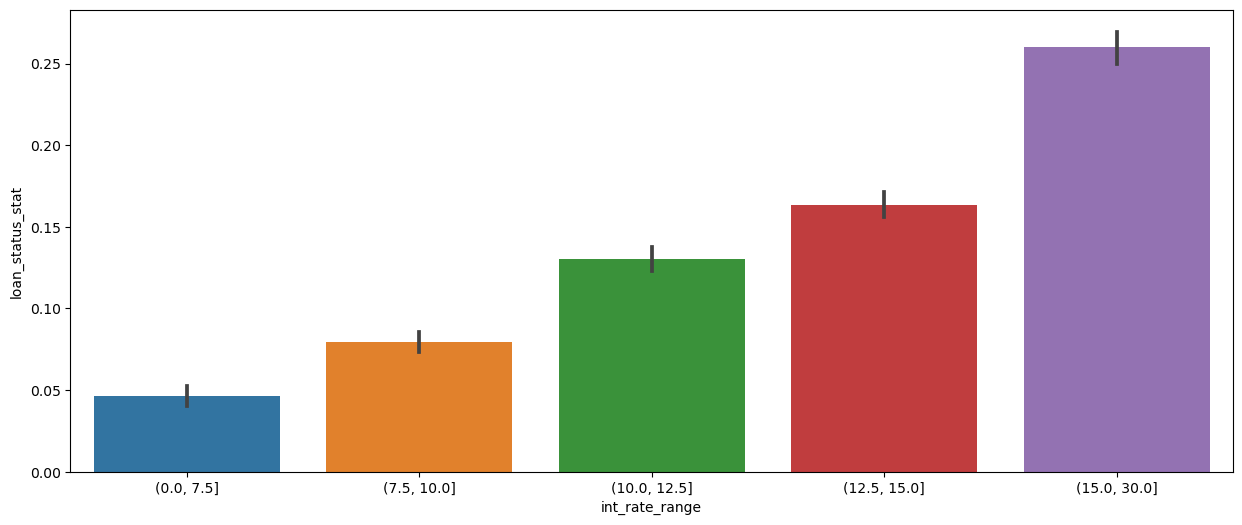

In [22]:
# Interest Rate vas Defaulter

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='int_rate_range', y='loan_status_stat', data=bank)

###### From above plot we can say that the defaulters rate is increasing as with interest rates, hence defaulter rate will depend on interest rate.

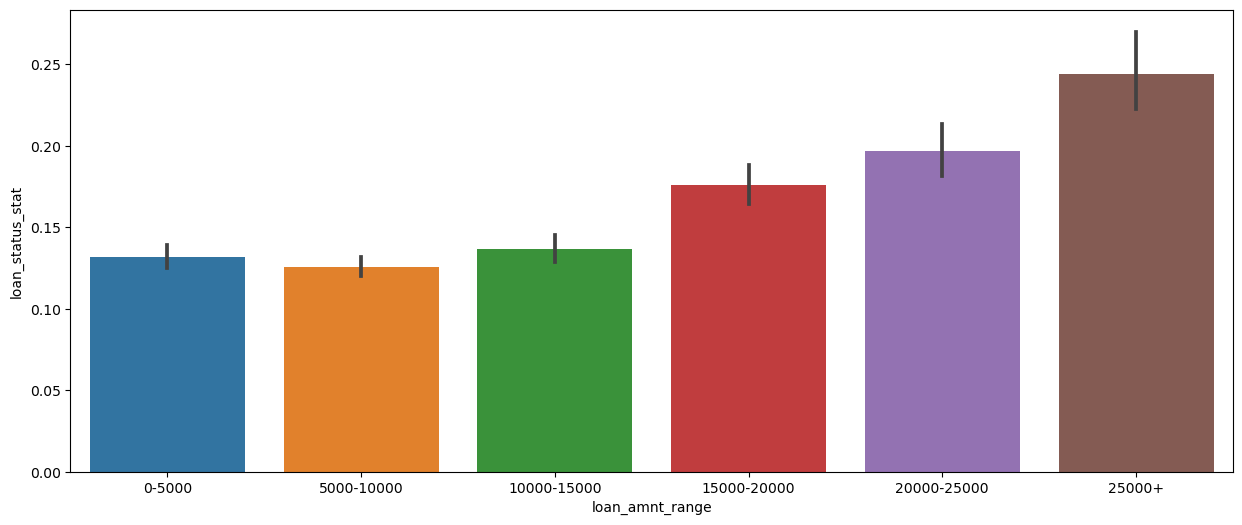

In [23]:

#Loan Amount vs Defaulter

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='loan_amnt_range', y='loan_status_stat', data=bank)

###### From above plot we can say that the defaulters rate is increasing as with Loan Amount, hence defaulter rate will depend on loan amount.

array([8.370e+01, 9.400e+00, 9.850e+01, ..., 4.963e+01, 4.000e-02,
       7.280e+00])

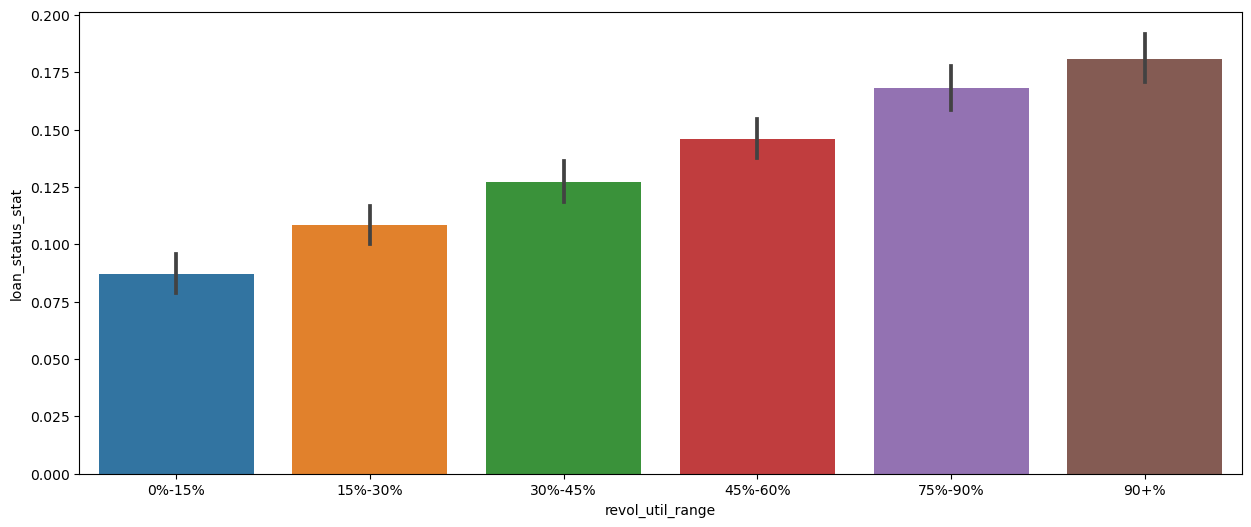

In [26]:
#Revol_util vs Defaulter

bank['revol_util'] = bank['revol_util'].str.replace('%','')
bank['revol_util'] = bank['revol_util'].astype('float')
bins = [0, 15, 30, 45, 60, 75, 90]
bucket_d = ['0%-15%', '15%-30%', '30%-45%', '45%-60%', '75%-90%', '90+%']
bank['revol_util_range'] = pd.cut(bank['revol_util'], bins, labels=bucket_d)

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='revol_util_range', y='loan_status_stat', data=bank)
bank['revol_util'].unique()

##### From above plot we can say that the defaulters rate is increasing as with revol_util, hence defaulter rate will depend on revol util.

# Bivariate Analysis

In [ ]:
#plot revol_util vs pursose wrt Defaulter